# Exploratory Data Analysis: PureCycle Technologies

In this project I will do some exploratory data analysis around PureCycle Technologies and some other related companies. This project's purpose is to learn more about PureCycle's stock so that I may create a customized algorithmic trading strategy for it in the future. 

## Load libraries

In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import pandas_datareader
import datetime
import pandas_datareader.data as web

## Import Data

In this step I will import some historical stock data from Yahoo Finance using the pandas-datareader library. I will import the historical stock data for PureCycle Technologies (PCT) and Agilyx (5NQ.BE), and the S&P 500 (^GSPC). There are a few reasons why I am considering these particular stocks. From my preliminary research, it seemed like AppHarvest's stock behaved simular to PureCycle Technologies stock. Agilyx was chosen because it is one of PureCycle Technologies competitors. Finally, the S&P 500 was chosen because it is a good reference for overall market trends.  

In [3]:
start = datetime.datetime(2021, 3, 19) # Day PCT went public
end = datetime.datetime(2021, 7, 30) # Day of last closing

# Read in yahoo finance data
PureCycle = web.DataReader("PCT", 'yahoo', start, end) # PureCycle
AppHarvest = web.DataReader("APPH", 'yahoo', start, end) # AppHarvest
Agilyx = web.DataReader("5NQ.BE", 'yahoo', start, end) # Agilyx
SP = web.DataReader("^GSPC", 'yahoo', start, end) # S&P 500

# Confirm that data was sucessfully imported
print(PureCycle.head())
# print(AppHarvest.head())
# print(Agilyx.head())
# print(SP.head())


                 High     Low       Open      Close   Volume  Adj Close
Date                                                                   
2021-03-19  33.990002  31.000  31.000000  32.320000  1792600  32.320000
2021-03-22  34.919998  28.900  33.080002  32.209999  3155800  32.209999
2021-03-23  33.980000  29.371  31.490000  32.650002  1579500  32.650002
2021-03-24  33.900002  30.160  33.369999  32.070000   708200  32.070000
2021-03-25  31.906000  26.900  31.750000  29.290001  1315000  29.290001


## Exploring and Visualizing the Data

For the first step I used the df.info() function to get a better understanding of the data. 

In [49]:
PureCycle.info()
# AppHarvest.info()
# Agilyx.info()
# SP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2021-03-19 to 2021-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       93 non-null     float64
 1   Low        93 non-null     float64
 2   Open       93 non-null     float64
 3   Close      93 non-null     float64
 4   Volume     93 non-null     int64  
 5   Adj Close  93 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 5.1 KB


Next, I want to get summaries of the data sets.

In [14]:
print(PureCycle.describe())
print(AppHarvest.describe())
print(Agilyx.describe())
print(SP.describe())

            High        Low       Open      Close        Volume  Adj Close
count  93.000000  93.000000  93.000000  93.000000  9.300000e+01  93.000000
mean   22.529677  20.388645  21.560624  21.373333  1.446561e+06  21.373333
std     5.505364   5.178085   5.412975   5.309497  1.410353e+06   5.309497
min    12.765000  10.060000  11.050000  10.820000  4.741000e+05  10.820000
25%    17.809999  16.010000  17.000000  16.740000  7.117000e+05  16.740000
50%    22.780001  20.129999  21.139999  20.930000  1.033200e+06  20.930000
75%    26.860001  24.650000  25.900000  25.730000  1.579500e+06  25.730000
max    34.919998  31.000000  33.369999  32.650002  1.100110e+07  32.650002
            High        Low       Open      Close        Volume  Adj Close
count  93.000000  93.000000  93.000000  93.000000  9.300000e+01  93.000000
mean   16.342280  15.149667  15.868667  15.677473  1.507842e+06  15.677473
std     2.368456   2.206474   2.384545   2.287682  9.830255e+05   2.287682
min    12.150000  10.9000

Now I will use the matplotlib library to plot PCT's adjusted closing price. 

Text(0, 0.5, 'Price')

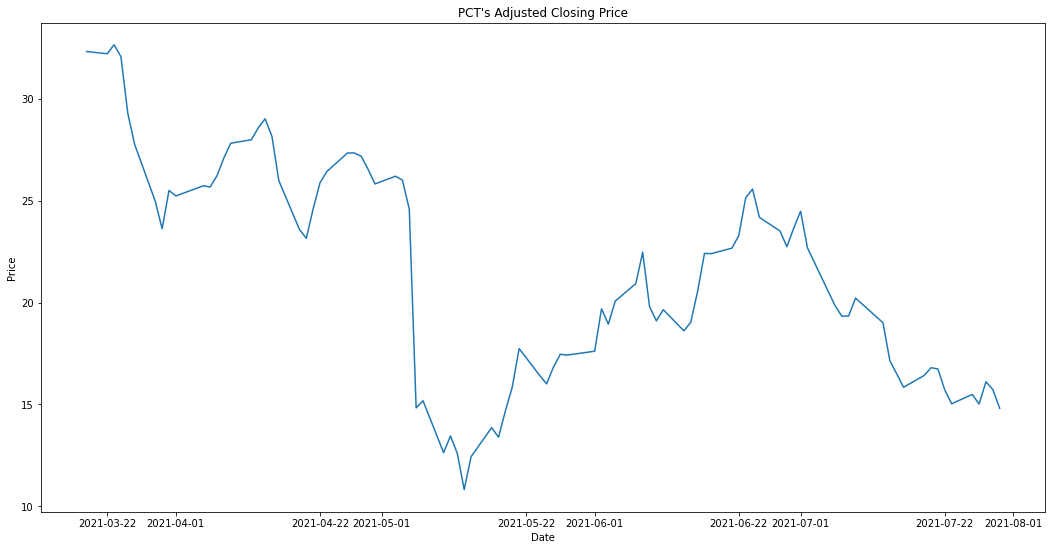

In [10]:
# Plot the adjusted closing price for PureCycle Technologies
plt.figure(figsize = (18, 9)) # Figure size
plt.plot(PureCycle['Adj Close'])
plt.title("PCT's Adjusted Closing Price") # Add plot title
plt.xlabel("Date") # Add x label
plt.ylabel("Price") # Add y label

I would also like to see how AppHarvest's adjusted closing price compares to that of PureCycle Technologies.

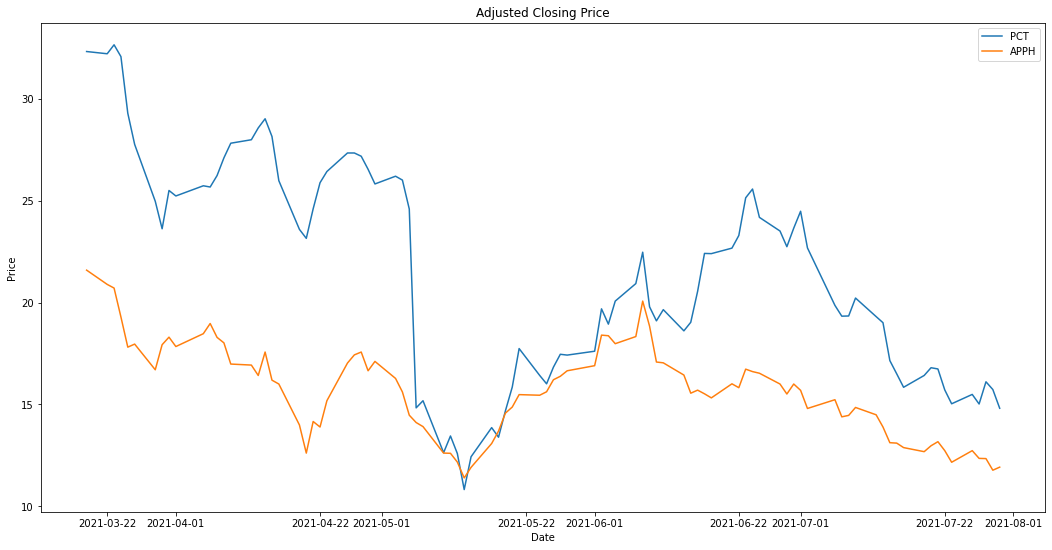

In [49]:
plt.figure(figsize = (18,9)) # Figure size

# Plot the adjusted closing price for PCT and APPH in the same window
plt.plot(PureCycle['Adj Close'], label = "PCT")
plt.plot(AppHarvest['Adj Close'], label = "APPH") 

plt.title("Adjusted Closing Price") # Add plot title
plt.xlabel("Date") # Add x label
plt.ylabel("Price") # Add y label
plt.legend() # Add legend for the stocks

Next, I will calculate the return for each stock. 

In [4]:
# Calculate returns and add to each stock's data frame
PureCycle['Returns'] = (PureCycle['Close'] - PureCycle['Open']) / PureCycle['Open']
AppHarvest['Returns'] = (AppHarvest['Close'] - AppHarvest['Open']) / AppHarvest['Open']
Agilyx['Returns'] = (Agilyx['Close'] - Agilyx['Open']) / Agilyx['Open']
SP['Returns'] = (SP['Close'] - SP['Open']) / SP['Open']

Next, I will plot the distribution for PureCycle's daily return price.

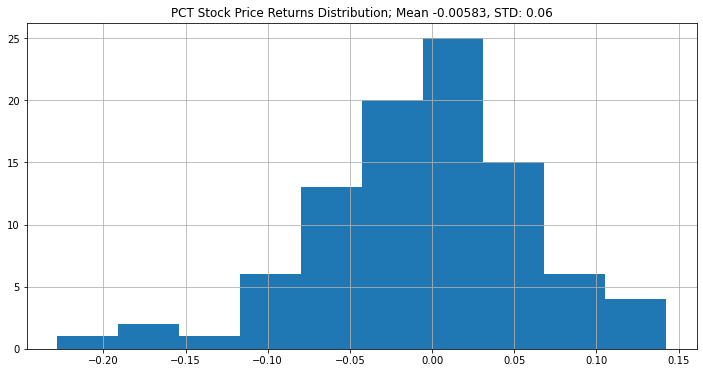

In [51]:
PCT_Mean_Returns = np.round(PureCycle['Returns'].mean(), 5) # Include 5 digits after the decimal
PCT_STD_Returns = np.round(PureCycle['Returns'].std(), 2) # Include 2 digits after the decimal

plt.figure(figsize = (12,6)) # Figure size

# Plot histogram for daily returns
PureCycle['Returns'].hist()

plt.title(f'PCT Stock Price Returns Distribution; Mean: {PureCycle_Mean_Returns}, STD: {PureCycle_STD_Returns}')

plt.show()

For the next visualization, I will create a boxplots for each stocks' daily returns.

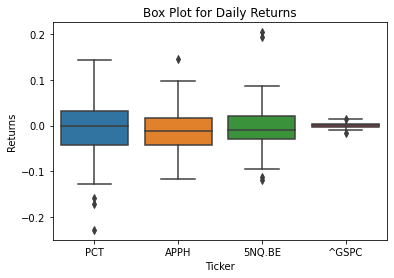

In [53]:
# Combine returns for each stock into single data frame
PureCycle['Ticker'] = 'PCT'
AppHarvest['Ticker'] = 'APPH'
Agilyx['Ticker'] = '5NQ.BE'
SP['Ticker'] = '^GSPC'

stocks_df = pd.concat([PureCycle, AppHarvest, Agilyx, SP])
stocks_df = stocks_df[['Ticker', 'Returns']]


# Generate boxplot
sns.boxplot(x = stocks_df['Ticker'], y = stocks_df['Returns'])

plt.title('Box Plot for Daily Returns') # Add title to plot

plt.show()

For my final visualization, I will create a correlation heat map for the returns.

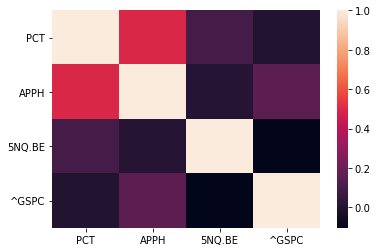

In [54]:
# Create new data frame
Pivot_df = pd.DataFrame({'PCT':PureCycle['Returns'], 'APPH':AppHarvest['Returns'], '5NQ.BE':Agilyx['Returns'], '^GSPC':SP['Returns']})

Corr_df = Pivot_df.corr(method='pearson') # Compute the Pearson correlation coefficient 

# Plot the correlation heat map
sns.heatmap(Corr_df)
plt.yticks(rotation = 0)
plt.show()


# Next Steps
While this exploratory data analysis has been very useful, there is still more work to be done before I can begin to work on an effective algorithmic trading bot. My next step will be to examine technical indicators like the MACD or OBV. 